## Reading of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pd.set_option('display.float_format', lambda x: '%.3f' % x)

DATA_PATH = "./../../data/raw/dataset.csv"

In [2]:
data = pd.read_csv(DATA_PATH).iloc[:, 1:] # exclude the first column as it is the index

In [3]:
data

,gene_id,transcript_id,transcript_position,k_mer,left_dwell,left_std,left_mean,mid_dwell,mid_std,mid_mean,right_dwell,right_std,right_mean,label,D1,D2,R,H1,H2
0,ENSG00000004059,ENST00000000233,244,AAGACCA,0.003,2.060,125.000,0.018,10.400,122.000,0.009,10.900,84.100,0,1,0,0,0,1
1,ENSG00000004059,ENST00000000233,244,AAGACCA,0.006,2.530,125.000,0.008,4.670,126.000,0.010,6.300,80.900,0,1,0,0,0,1
2,ENSG00000004059,ENST00000000233,244,AAGACCA,0.005,3.920,109.000,0.014,12.000,124.000,0.005,2.130,79.600,0,1,0,0,0,1
3,ENSG00000004059,ENST00000000233,244,AAGACCA,0.004,2.060,125.000,0.008,5.010,130.000,0.005,3.780,80.400,0,1,0,0,0,1
4,ENSG00000004059,ENST00000000233,244,AAGACCA,0.007,2.920,120.000,0.003,3.940,129.000,0.013,7.150,82.200,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027101,ENSG00000167747,ENST00000641834,1693,TTGACAT,0.004,7.490,108.000,0.006,10.200,116.000,0.010,2.010,76.400,0,0,0,0,1,0
11027102,ENSG00000167747,ENST00000641834,1693,TTGACAT,0.007,1.910,109.000,0.006,12.300,110.000,0.018,2.610,74.600,0,0,0,0,1,0
11027103,ENSG00000167747,ENST00000641834,1693,TTGACAT,0.007,4.580,105.000,0.004,6.580,113.000,0.003,2.280,85.300,0,0,0,0,1,0
11027104,ENSG00000167747,ENST00000641834,1693,TTGACAT,0.003,2.330,109.000,0.009,10.400,108.000,0.007,4.440,76.800,0,0,0,0,1,0


# Seeing if there are distinct clusters from all the 0 and 1 labels

Spoiler: no

In [4]:
pca = PCA(n_components=2)
pca.fit(data.iloc[:, 4: 13])
print(pca.explained_variance_ratio_)

[0.55011314 0.32987643]


In [5]:
data_transform = pca.transform(data.iloc[:, 4: 13])
data_transform = np.c_[data_transform, data.label.values]

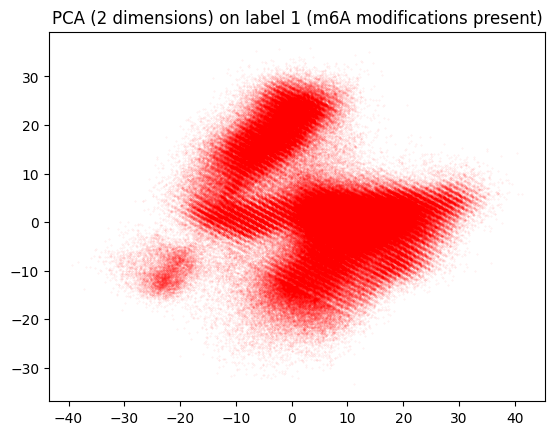

In [6]:
plt.scatter(data_transform[data_transform[:,2] == 1,0], 
            data_transform[data_transform[:,2] == 1,1], 
            s=0.1, 
            color='red', 
            alpha = 0.1)

plt.title("PCA (2 dimensions) on label 1 (m6A modifications present)")
plt.show()

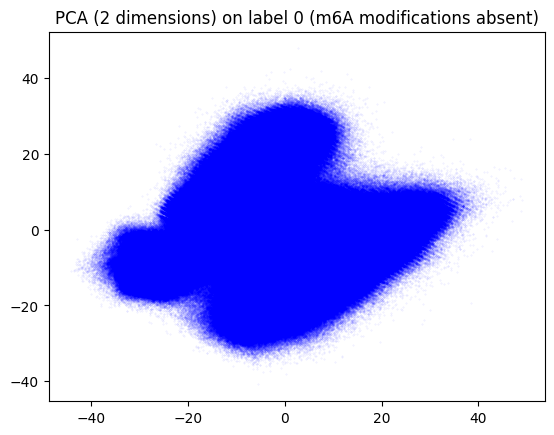

In [7]:
plt.scatter(data_transform[data_transform[:,2] == 0,0], 
            data_transform[data_transform[:,2] == 0,1], 
            s=0.1, 
            color='blue', 
            alpha = 0.1)

plt.title("PCA (2 dimensions) on label 0 (m6A modifications absent)")
plt.show()

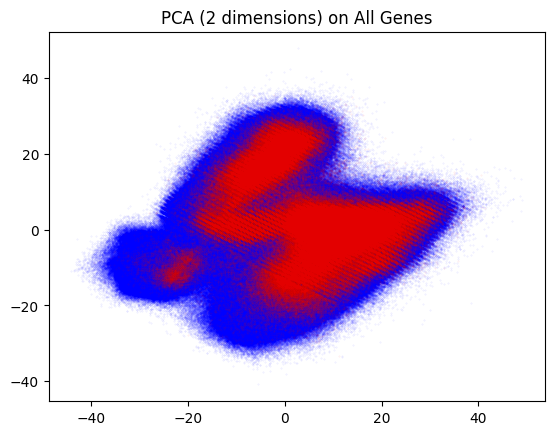

In [8]:
plt.scatter(data_transform[data_transform[:,2] == 0,0], 
            data_transform[data_transform[:,2] == 0,1], 
            s=0.1, 
            color='blue', 
            alpha = 0.1)

plt.scatter(data_transform[data_transform[:,2] == 1,0], 
            data_transform[data_transform[:,2] == 1,1], 
            s=0.1, 
            color='red', 
            alpha = 0.1)

plt.title("PCA (2 dimensions) on All Genes")
plt.show()

There's no obvious clustering between the two labels if we look at all the genes as a whole

# Repeating the same analysis, but for one gene.

I chose ENSG00000096384 because it is the gene with the most number of reads (info taken from EDA notebook)

In [9]:
gene_data = data.loc[data.gene_id == "ENSG00000096384"]

In [10]:
pca = PCA(n_components=2)
pca.fit(gene_data.iloc[:, 4: 13])
print(pca.explained_variance_ratio_)

[0.46276936 0.39998451]


In [11]:
gene_data_transform = pca.transform(gene_data.iloc[:, 4: 13])
gene_data_transform = np.c_[gene_data_transform, gene_data.label.values]

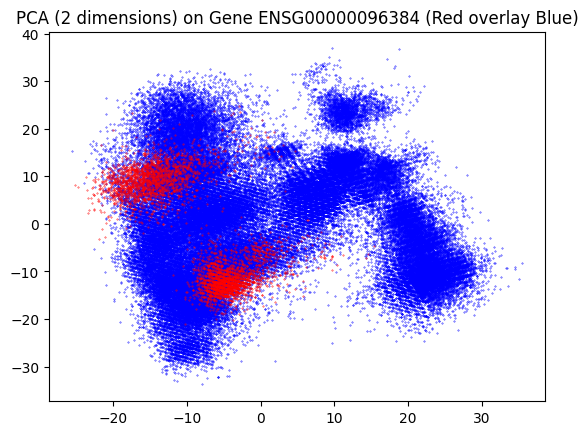

In [12]:
plt.scatter(gene_data_transform[gene_data_transform[:,2] == 0,0], 
            gene_data_transform[gene_data_transform[:,2] == 0,1], 
            s=0.1, 
            color='blue', 
            alpha = 1)

plt.scatter(gene_data_transform[gene_data_transform[:,2] == 1,0], 
            gene_data_transform[gene_data_transform[:,2] == 1,1], 
            s=0.1, 
            color='red', 
            alpha = 1)

plt.title("PCA (2 dimensions) on Gene ENSG00000096384 (Red overlay Blue)")
plt.show()

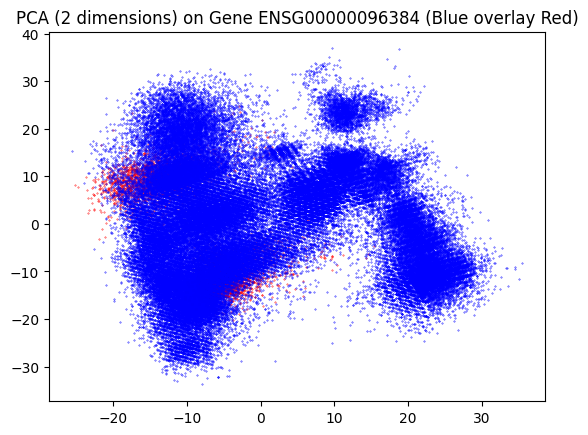

In [13]:
plt.scatter(gene_data_transform[gene_data_transform[:,2] == 1,0], 
            gene_data_transform[gene_data_transform[:,2] == 1,1], 
            s=0.1, 
            color='red', 
            alpha = 1)

plt.scatter(gene_data_transform[gene_data_transform[:,2] == 0,0], 
            gene_data_transform[gene_data_transform[:,2] == 0,1], 
            s=0.1, 
            color='blue', 
            alpha = 1)

plt.title("PCA (2 dimensions) on Gene ENSG00000096384 (Blue overlay Red)")
plt.show()

From the two plots above, there is lots of overlap between the two labels if we just take use the dwelling time, signal mean and signal sd features of our dataset. However, there are two obvious clusters for the `label = 1` (red) datapoints.

In [34]:
cluster1 = gene_data.loc[(gene_data_transform[:,0] < 0) & (gene_data_transform[:,2] == 1),:]
cluster2 = gene_data.loc[(gene_data_transform[:,0] >= 0) & (gene_data_transform[:,2] == 1),:]

In [ ]:
cluster1["transcript_annotation"] = cluster1["transcript_id"] + " " + cluster1["transcript_position"].astype(str)
cluster2["transcript_annotation"] = cluster2["transcript_id"] + " " + cluster2["transcript_position"].astype(str)

In [36]:
cluster1.head()

,gene_id,transcript_id,transcript_position,k_mer,left_dwell,left_std,left_mean,mid_dwell,mid_std,mid_mean,right_dwell,right_std,right_mean,label,transcript_annotation
5244173,ENSG00000096384,ENST00000353801,1053,ATGACTG,0.005,4.370,95.800,0.003,4.950,128.000,0.003,3.830,91.500,1,ENST00000353801 1053
5244174,ENSG00000096384,ENST00000353801,1053,ATGACTG,0.005,3.950,96.200,0.006,8.940,120.000,0.009,3.190,89.700,1,ENST00000353801 1053
5244175,ENSG00000096384,ENST00000353801,1053,ATGACTG,0.003,3.450,96.300,0.003,6.780,129.000,0.003,1.270,90.300,1,ENST00000353801 1053
5244176,ENSG00000096384,ENST00000353801,1053,ATGACTG,0.008,5.070,95.600,0.007,5.830,123.000,0.008,1.920,91.000,1,ENST00000353801 1053
5244177,ENSG00000096384,ENST00000353801,1053,ATGACTG,0.011,3.330,95.000,0.007,7.700,124.000,0.006,5.070,91.300,1,ENST00000353801 1053


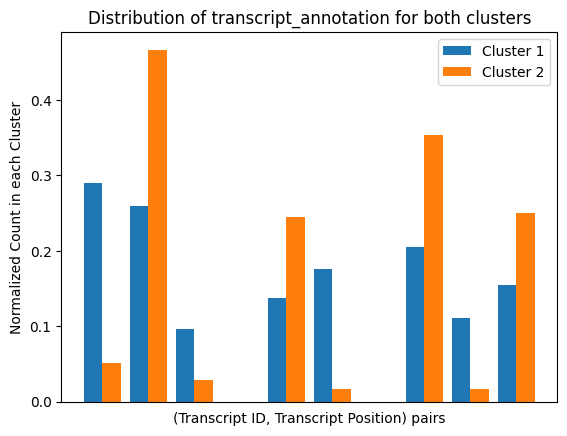

In [39]:
plt.hist([cluster1.transcript_annotation, cluster2.transcript_annotation], density=True, label=["Cluster 1","Cluster 2"])
plt.title("Distribution of transcript_annotation for both clusters")
plt.xticks([])
plt.xlabel("(Transcript ID, Transcript Position) pairs")
plt.ylabel("Normalized Count in each Cluster")
plt.legend()
plt.show()

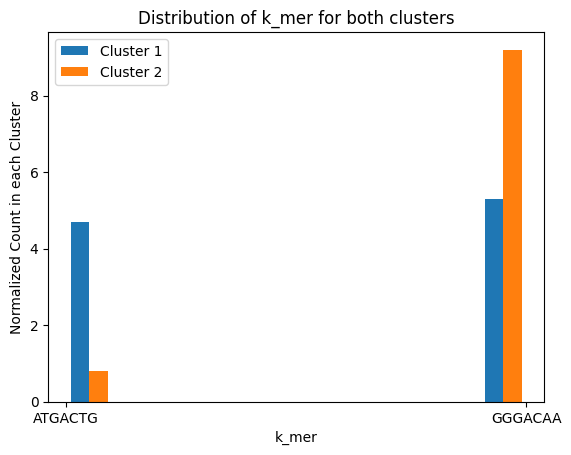

In [41]:
plt.hist([cluster1.k_mer, cluster2.k_mer], density=True, label=["Cluster 1","Cluster 2"])
plt.title("Distribution of k_mer for both clusters")
plt.xlabel("k_mer")
plt.ylabel("Normalized Count in each Cluster")
plt.legend()
plt.show()

Due to the different distributions of k_mer and (transcript ID, transcript position) pairs between both red clusters, we cannot rule out the possibility that these features are confounders. In other words, the two clusters may not be due to m6A modifications, but due to different k_mer and/or different (transcript ID, transcript position) pairs

# Next Step: 

Encode these categorical features and feed them into PCA to see if there are still unexplained variances. If there are, then we are safe to attribute these variances to m6A modifications